#**CSD458 HW5**
Classify Fashion MNist images using CNNs



### **PART A: Training Convolutional Neural Networks (CNNs)**



#### 1. Download the Fashion Mnist Dataset



In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.v2 as v2
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.tensorboard import SummaryWriter



mean = [0.485]
std = [0.229]
transforms_train = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=mean, std=std),
])
transforms_test = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=mean, std=std),
    ]
)

# Define a Dataset and a Dataloader both for training and test data
batch_size = 128
trainset = torchvision.datasets.MNIST(root="./Data", train=True, transform=transforms_train, download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.MNIST(root="./Data", train=False, transform=transforms_test, download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

#### 2. Define the Dataset, Dataloader, Transforms. Use v2.Compose() to include even more transforms, such as rotations, crops and others.



In [22]:
# Define a Pytorch Transforms Pipeline
mean = [0.485]
std = [0.229]
transforms_train = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=mean, std=std),
])
transforms_test = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=mean, std=std),
    ]
)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

#### 3. Make your own version of CNN and report the validatation set accuracy



In [23]:
import torch.optim as optim
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

# Evaluate the model on the validation set
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print('Validation set accuracy: %f %%' % accuracy)

[1,   100] loss: 0.535
[1,   200] loss: 0.121
[1,   300] loss: 0.090
[1,   400] loss: 0.075
[2,   100] loss: 0.053
[2,   200] loss: 0.052
[2,   300] loss: 0.050
[2,   400] loss: 0.044
[3,   100] loss: 0.035
[3,   200] loss: 0.039
[3,   300] loss: 0.041
[3,   400] loss: 0.028
[4,   100] loss: 0.022
[4,   200] loss: 0.025
[4,   300] loss: 0.026
[4,   400] loss: 0.028
[5,   100] loss: 0.019
[5,   200] loss: 0.016
[5,   300] loss: 0.023
[5,   400] loss: 0.018
Finished Training
Validation set accuracy: 98.750000 %


#### 4. Make 2 variations of CNNs (using different convolutions or pooling parameters) and compare them.



In [24]:
class CNN_Variation1(nn.Module):
    def __init__(self):
        super(CNN_Variation1, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the second CNN variation
class CNN_Variation2(nn.Module):
    def __init__(self):
        super(CNN_Variation2, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.pool = nn.AvgPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x


def train_and_evaluate(model):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training
    for epoch in range(3):  # Reduced number of epochs for faster comparison
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 100 == 99:
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 100))
                running_loss = 0.0

    print('Finished Training')

# Variation 1

print("Training CNN Variation 1:")
cnn_variation1 = CNN_Variation1()
train_and_evaluate(cnn_variation1)

Training CNN Variation 1:
[1,   100] loss: 0.603
[1,   200] loss: 0.182
[1,   300] loss: 0.118
[1,   400] loss: 0.091
[2,   100] loss: 0.070
[2,   200] loss: 0.060
[2,   300] loss: 0.058
[2,   400] loss: 0.060
[3,   100] loss: 0.045
[3,   200] loss: 0.041
[3,   300] loss: 0.042
[3,   400] loss: 0.047
Finished Training


In [25]:
# Variation 2

print("\nTraining CNN Variation 2:")
cnn_variation2 = CNN_Variation2()
train_and_evaluate(cnn_variation2)


Training CNN Variation 2:
[1,   100] loss: 0.483
[1,   200] loss: 0.135
[1,   300] loss: 0.103
[1,   400] loss: 0.068
[2,   100] loss: 0.050
[2,   200] loss: 0.053
[2,   300] loss: 0.054
[2,   400] loss: 0.050
[3,   100] loss: 0.034
[3,   200] loss: 0.035
[3,   300] loss: 0.036
[3,   400] loss: 0.040
Finished Training


#### 5. Increase the number of Layers of the CNN (the number of convolutions followed by pooling layers) and observe what happens, in terms of the progress of the training and validation losses and the final model accuracies.



In [26]:
class CNN_Large(nn.Module):
    def __init__(self):
        super(CNN_Large, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 3 * 3, 256)  # Updated input size for the first fully connected layer
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 128 * 3 * 3)  # Update the size calculation for the fully connected layer
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define a function for training and evaluation
def train_and_evaluate(model):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training
    for epoch in range(5):  # 5 epochs
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 100 == 99:
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 100))
                running_loss = 0.0

    print('Finished Training')

    # Evaluation
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print('Validation set accuracy: %f %%' % accuracy)

# Define the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Create and train the CNN with increased layers
print("Training CNN with Increased Layers:")
cnn_large = CNN_Large()
train_and_evaluate(cnn_large)

Training CNN with Increased Layers:
[1,   100] loss: 0.543
[1,   200] loss: 0.112
[1,   300] loss: 0.081
[1,   400] loss: 0.065
[2,   100] loss: 0.048
[2,   200] loss: 0.049
[2,   300] loss: 0.041
[2,   400] loss: 0.043
[3,   100] loss: 0.030
[3,   200] loss: 0.031
[3,   300] loss: 0.029
[3,   400] loss: 0.030
[4,   100] loss: 0.020
[4,   200] loss: 0.017
[4,   300] loss: 0.030
[4,   400] loss: 0.024
[5,   100] loss: 0.015
[5,   200] loss: 0.020
[5,   300] loss: 0.015
[5,   400] loss: 0.018
Finished Training
Validation set accuracy: 99.090000 %


#### 6. Visualize some of the Feature Maps and Convolution Kernels that you find interesting.

Visualizing Feature Maps:


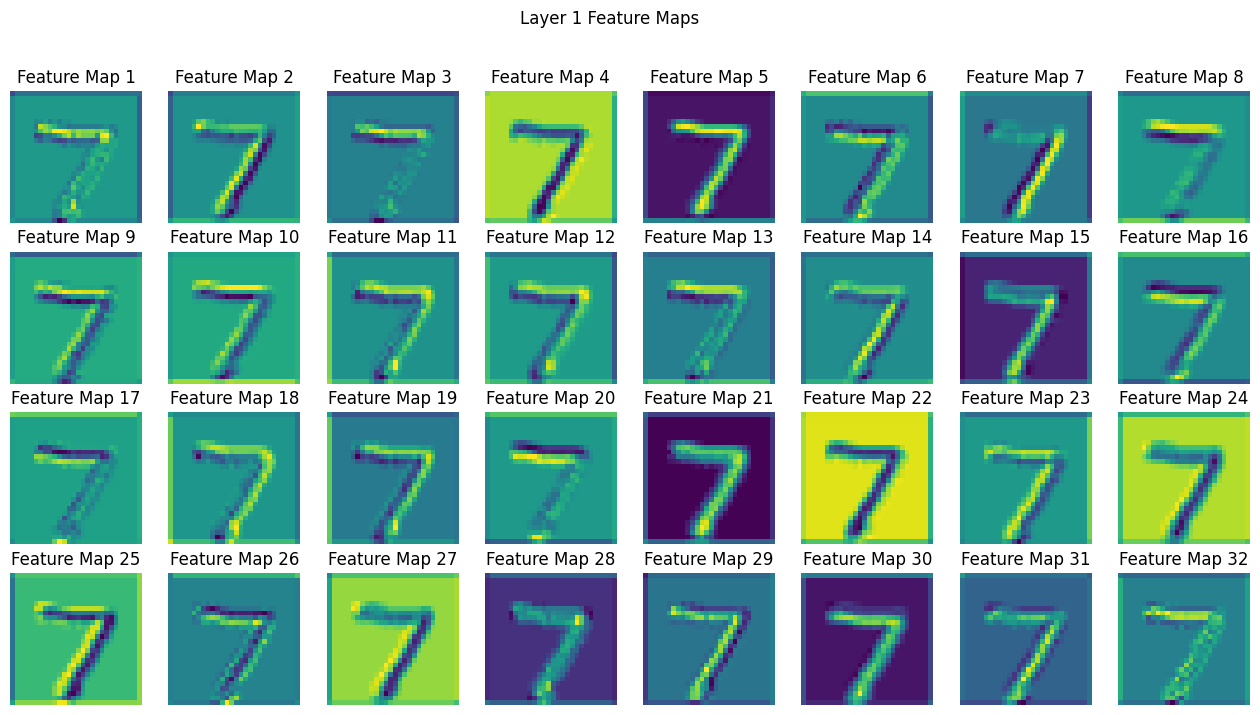

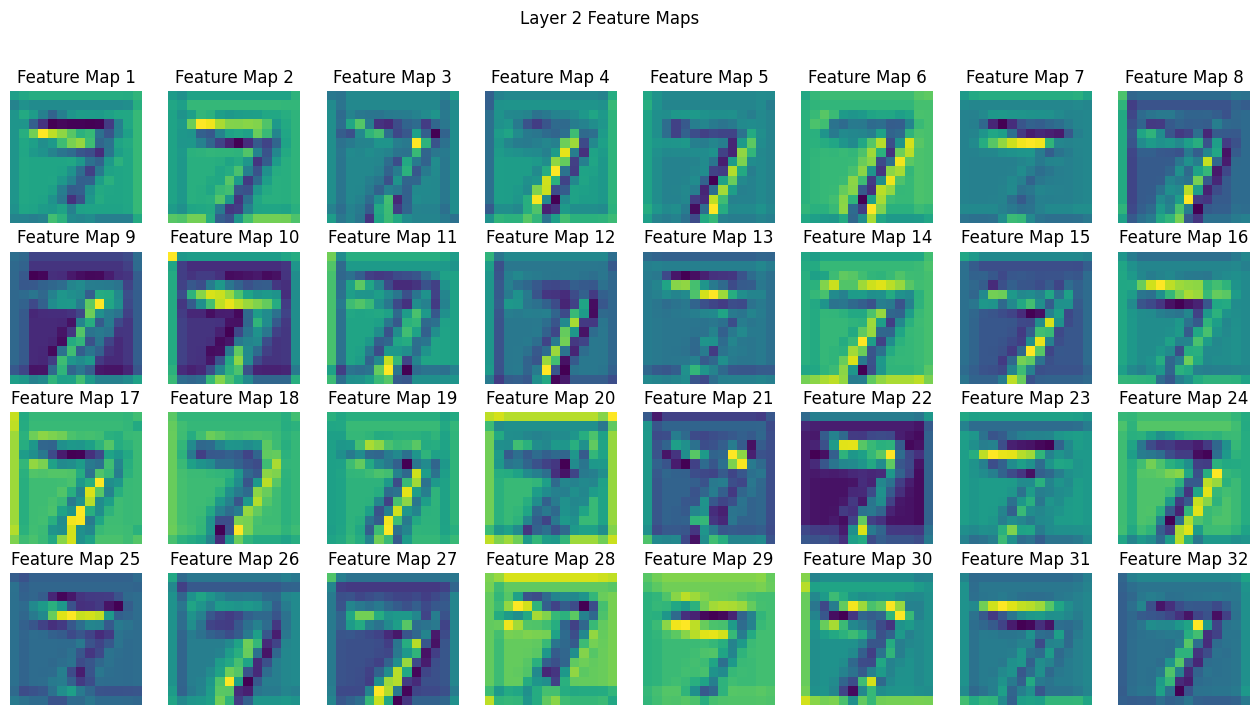


Visualizing Convolution Kernels:


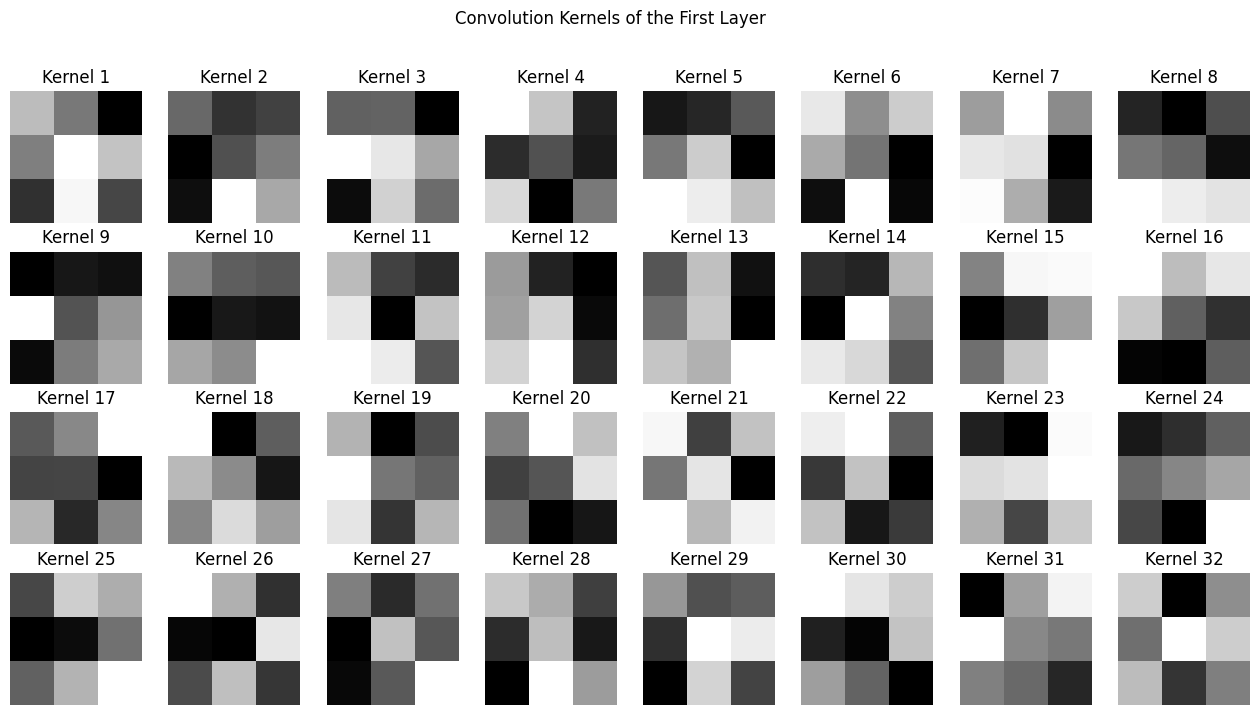

In [27]:
# Function to visualize feature maps
def visualize_feature_maps(model, input_image):
    # Define hooks to extract feature maps from selected layers
    activations = []
    def hook_fn(module, input, output):
        activations.append(output)

    # Register hook to selected layers
    hooks = []
    selected_layers = [model.conv1, model.conv2]
    for layer in selected_layers:
        hook = layer.register_forward_hook(hook_fn)
        hooks.append(hook)

    # Forward pass to get activations
    model.eval()
    with torch.no_grad():
        model(input_image.unsqueeze(0))  # Add batch dimension

    # Plot feature maps
    for i, activation in enumerate(activations):
        fig, axes = plt.subplots(4, 8, figsize=(16, 8))
        for j in range(32):  # Plot first 32 feature maps
            ax = axes[j // 8, j % 8]
            ax.imshow(activation[0, j].cpu(), cmap='viridis')
            ax.axis('off')
            ax.set_title(f'Feature Map {j+1}')
        plt.suptitle(f'Layer {i+1} Feature Maps')
        plt.show()

    # Remove hooks
    for hook in hooks:
        hook.remove()

# Function to visualize convolution kernels
def visualize_conv_kernels(model):
    fig, axes = plt.subplots(4, 8, figsize=(16, 8))
    for i in range(32):  # Plot first 32 kernels of the first convolutional layer
        ax = axes[i // 8, i % 8]
        ax.imshow(model.conv1.weight[i, 0].detach().cpu(), cmap='gray')
        ax.axis('off')
        ax.set_title(f'Kernel {i+1}')
    plt.suptitle('Convolution Kernels of the First Layer')
    plt.show()

# Load a sample image
sample_image, _ = testset[0]

# Visualize feature maps
print("Visualizing Feature Maps:")
visualize_feature_maps(cnn_large, sample_image)

# Visualize convolution kernels
print("\nVisualizing Convolution Kernels:")
visualize_conv_kernels(cnn_large)




### **PART B: Transfer Learning**







#### 1. Load a Pretrained model (the simpler the better for computational efficiency e.g.resnet16). You are gonna use it to train your model on Fashion Mnist

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

mean = [0.485]
std = [0.229]
transforms_train = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=mean, std=std),
])
transforms_test = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=mean, std=std),
    ]
)


# Load pretrained ResNet-18 model
resnet18 = models.resnet18(pretrained=True)

# Modify the first layer to accept single-channel input
resnet18.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 129MB/s]


#### 2. Freeze the BackBone of the pretrained model (Convolutions etc) and modify the final fully connected layer/layers that perform classification (make sure the new output dimension matches the number of classes in Fashion Mnist)

In [29]:
# Freeze all the parameters in the pre-trained model
for param in resnet18.parameters():
    param.requires_grad = False

# Modify the last fully connected layer to match the number of classes in Fashion MNIST (10 classes)
num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, 10)  # 10 classes in Fashion MNIST

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.fc.parameters(), lr=0.001, momentum=0.9)

# Train the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet18.to(device)

num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 1.992
[1,   200] loss: 1.613
[1,   300] loss: 1.510
[1,   400] loss: 1.440
[2,   100] loss: 1.378
[2,   200] loss: 1.362
[2,   300] loss: 1.344
[2,   400] loss: 1.315
[3,   100] loss: 1.308
[3,   200] loss: 1.284
[3,   300] loss: 1.289
[3,   400] loss: 1.277
[4,   100] loss: 1.273
[4,   200] loss: 1.245
[4,   300] loss: 1.271
[4,   400] loss: 1.243
[5,   100] loss: 1.231
[5,   200] loss: 1.238
[5,   300] loss: 1.235
[5,   400] loss: 1.247
Finished Training


#### 3. Train the model on Fashion Mnist for a few epoches and log your train/val loss progress as well as the final model accuracy on the validation set.

#### **Optional:** If you are interested you can also unfreeze the final convolutions of the pretrained model to Fine Tune it. You can even visualize the Feature Maps of you model.

#### *Guidelines*: The goal of this assignment is that you play around a little bit with terms and notions introduced. You don' t have to train your models for ages. 5-10 epoches will suffice. We just want to see that you can make a model properly, train it and log some results.